**MISIÓN 2: Predicción de éxito de películas en el cine con Técnicas de Regresión**

1.
Introducción al Aprendizaje Automático y Dataset de Películas
El aprendizaje supervisado ha revolucionado la industria cinematográfica al permitir predicciones y análisis basados en datos que optimizan decisiones clave en producción, marketing y distribución. Este enfoque se aplica comúnmente para anticipar el desempeño de las películas en la taquilla, evaluar la recepción crítica, identificar audiencias objetivo y recomendar contenidos personalizados. A través de modelos como la regresión y la clasificación, los estudios pueden estimar el éxito comercial de una película incluso antes de su estreno, proporcionando información valiosa para ajustar presupuestos, diseñar estrategias publicitarias y planificar la distribución.

Dentro de un conjunto de datos orientado a analizar el éxito y los ingresos de las películas, algunas variables clave son esenciales para una predicción efectiva. Por ejemplo, el presupuesto asignado a la producción es crucial, ya que influye en aspectos como la calidad técnica y el alcance de las campañas promocionales, que a su vez afectan los ingresos. El género también juega un rol determinante, pues condiciona las expectativas del público y su desempeño en mercados específicos. Asimismo, el protagonismo de actores reconocidos puede ser un factor decisivo para atraer a los espectadores. Las reseñas de críticos y las calificaciones de plataformas como IMDB también son relevantes, ya que afectan directamente la percepción pública y, por ende, la recaudación. Finalmente, las estrategias de marketing, como la cobertura de los medios y la intensidad de la promoción, completan el panorama de variables importantes.

En el análisis mediante un modelo de regresión lineal para predecir la recaudación (Gross) de una película, consideraremos como variables independientes el presupuesto (Budget), que refleja la inversión en producción; la puntuación en plataformas como IMDB, que mide la percepción de calidad por parte del público y críticos; y la duración de la película, un factor que puede influir tanto en la experiencia del espectador como en la cantidad de proyecciones posibles por día en los cines. Estas variables representan elementos esenciales que, al ser analizados en conjunto, ofrecen una perspectiva integral sobre los factores que influyen en el éxito económico de las películas.

In [ ]:
#Nombre de integrantes:
#Zharick Natalia Alarcón Delgado
#Maria Clara Moreno Camayo
#Juan Diego Ramirez Cardozo
#Juan David Salazar Montoya

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [ ]:
# 1. Carga del Dataset: https://github.com/davidriveraarbelaez/IA_Explorador/blob/main/Datasets/movie_metadata_cleaned.csv
# Cargar el dataset proporcionado sobre películas en un DataFrame de pandas.
dataset = pd.read_csv ('/content/movie_metadata_cleaned.csv')

In [ ]:
# 2. Revisión General de los Datos:

# Imprimir las primeras 10 filas del dataset.
dataset.head(10)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,462.0,132.0,475.0,530.0,640.0,73058679.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000.0
5,392.0,156.0,0.0,4000.0,24000.0,336530303.0,1902.0,258000000.0,2007.0,11000.0,6.2,2.35,0.0
6,324.0,100.0,15.0,284.0,799.0,200807262.0,387.0,260000000.0,2010.0,553.0,7.8,1.85,29000.0
7,635.0,141.0,0.0,19000.0,26000.0,458991599.0,1117.0,250000000.0,2015.0,21000.0,7.5,2.35,118000.0
8,375.0,153.0,282.0,10000.0,25000.0,301956980.0,973.0,250000000.0,2009.0,11000.0,7.5,2.35,10000.0
9,673.0,183.0,0.0,2000.0,15000.0,330249062.0,3018.0,250000000.0,2016.0,4000.0,6.9,2.35,197000.0


In [ ]:
# Usar .info() y .describe() para entender mejor la estructura y las estadísticas básicas.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   3952 non-null   float64
 1   duration                 3952 non-null   float64
 2   director_facebook_likes  3952 non-null   float64
 3   actor_3_facebook_likes   3952 non-null   float64
 4   actor_1_facebook_likes   3952 non-null   float64
 5   gross                    3952 non-null   float64
 6   num_user_for_reviews     3952 non-null   float64
 7   budget                   3952 non-null   float64
 8   title_year               3952 non-null   float64
 9   actor_2_facebook_likes   3952 non-null   float64
 10  imdb_score               3952 non-null   float64
 11  aspect_ratio             3952 non-null   float64
 12  movie_facebook_likes     3952 non-null   float64
dtypes: float64(13)
memory usage: 401.5 KB


In [ ]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000,3.952000e+03,3952.000000,3.952000e+03,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000
mean,160.851721,109.765182,769.943067,719.721154,7404.627530,4.905082e+07,315.871964,4.284541e+07,2003.133856,1890.622470,6.472267,2.105099,8788.869180
std,121.168801,22.468246,3000.203497,1785.341391,15226.510851,6.789545e+07,398.302403,2.204447e+08,9.907701,4382.195816,1.049593,0.351002,20983.065786
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,1.000000,0.000000e+00,1920.000000,0.000000,1.600000,1.180000,0.000000
25%,73.000000,95.000000,10.000000,177.000000,718.000000,6.047046e+06,99.000000,8.000000e+06,1999.000000,357.000000,5.900000,1.850000,0.000000
50%,132.000000,105.000000,58.000000,422.000000,1000.000000,2.633662e+07,194.000000,2.200000e+07,2005.000000,655.000000,6.600000,2.350000,182.500000
75%,217.000000,120.000000,221.000000,678.000000,12000.000000,6.340933e+07,376.000000,5.000000e+07,2010.000000,963.000000,7.200000,2.350000,10000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [ ]:
# 3. Búsqueda y Eliminación de Duplicados:

# Verificar si hay filas duplicadas en el dataset utilizando el método .duplicated().

duplicados = dataset.duplicated().sum()
print(f'Duplicados encontrados:{duplicados}')

Duplicados encontrados:0


In [ ]:
# Si se encuentran duplicados, toca eliminarlos con .drop_duplicates() y verificar cuántos duplicados fueron eliminados.
dataset.drop_duplicates(inplace=True)
duplicados2 = dataset.duplicated().sum()
print(f'Duplicados eliminados. Filas restantes {dataset.shape[0]}')

Duplicados eliminados. Filas restantes 3952


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   3952 non-null   float64
 1   duration                 3952 non-null   float64
 2   director_facebook_likes  3952 non-null   float64
 3   actor_3_facebook_likes   3952 non-null   float64
 4   actor_1_facebook_likes   3952 non-null   float64
 5   gross                    3952 non-null   float64
 6   num_user_for_reviews     3952 non-null   float64
 7   budget                   3952 non-null   float64
 8   title_year               3952 non-null   float64
 9   actor_2_facebook_likes   3952 non-null   float64
 10  imdb_score               3952 non-null   float64
 11  aspect_ratio             3952 non-null   float64
 12  movie_facebook_likes     3952 non-null   float64
dtypes: float64(13)
memory usage: 401.5 KB


In [ ]:
#volver columna a float
dataset['movie_facebook_likes'] = dataset['movie_facebook_likes'].astype(float)

In [ ]:
#borrar filas con datos faltantes
dataset.dropna(inplace=True)

In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   3952 non-null   float64
 1   duration                 3952 non-null   float64
 2   director_facebook_likes  3952 non-null   float64
 3   actor_3_facebook_likes   3952 non-null   float64
 4   actor_1_facebook_likes   3952 non-null   float64
 5   gross                    3952 non-null   float64
 6   num_user_for_reviews     3952 non-null   float64
 7   budget                   3952 non-null   float64
 8   title_year               3952 non-null   float64
 9   actor_2_facebook_likes   3952 non-null   float64
 10  imdb_score               3952 non-null   float64
 11  aspect_ratio             3952 non-null   float64
 12  movie_facebook_likes     3952 non-null   float64
dtypes: float64(13)
memory usage: 401.5 KB


In [ ]:
# 4. Identificación de Valores Nulos:

# Identificar qué columnas tienen valores nulos y cuántos valores nulos hay en cada columna.
dataset.isnull().sum()

,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_1_facebook_likes,0
gross,0
num_user_for_reviews,0
budget,0
title_year,0
actor_2_facebook_likes,0


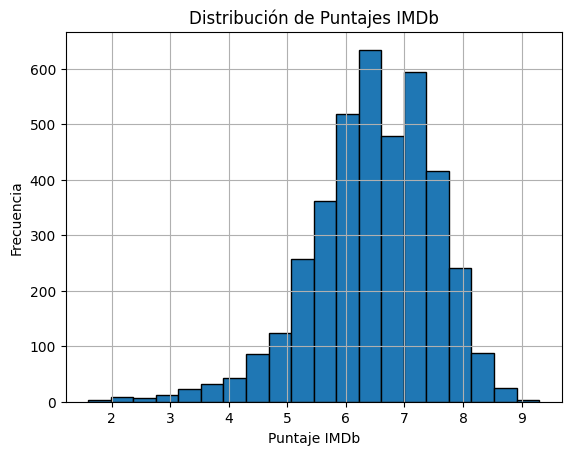

In [ ]:
# 5. Visualización de Variables:

# Histograma que muestre la distribución de la variable imdb_score.
plt.hist(dataset['imdb_score'], bins=20, edgecolor='black')
plt.title('Distribución de Puntajes IMDb')
plt.xlabel('Puntaje IMDb')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
# 6. Análisis de Correlaciones:
# Revisar qué tipo de datos tienen las columnas budget, gross y imdb_score.
dataset[['budget', 'imdb_score', 'duration','gross']].dtypes

,0
budget,float64
imdb_score,float64
duration,float64
gross,float64


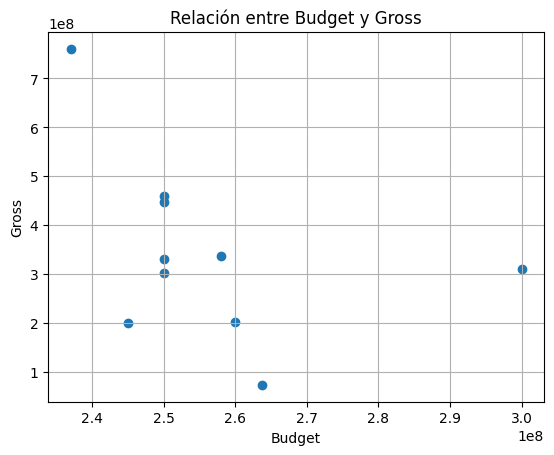

In [ ]:
# 7. Gráficos de Dispersión:

# Gráfico de dispersión para analizar la relación entre gross y budget.
plt.scatter (dataset['budget'].head(10), dataset['gross'].head(10))
plt.title('Relación entre Budget y Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.grid(True)
plt.show()


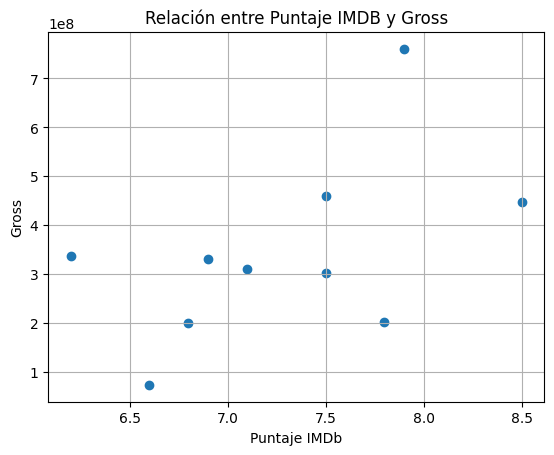

In [ ]:
# Gráfico de dispersión entre imdb_score y gross.
plt.scatter (dataset['imdb_score'].head(10), dataset['gross'].head(10))
plt.title('Relación entre Puntaje IMDB y Gross')
plt.xlabel('Puntaje IMDb')
plt.grid(True)
plt.ylabel('Gross')
plt.show()


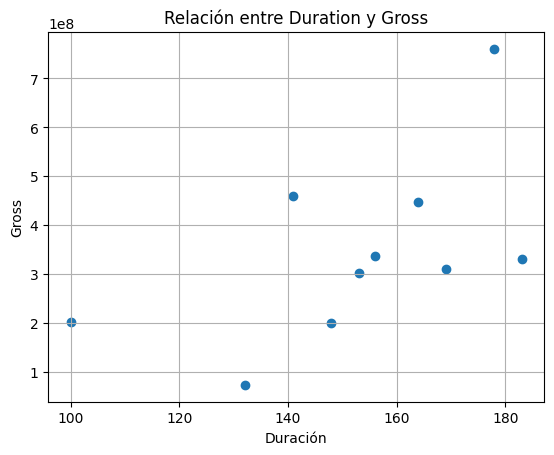

In [ ]:
# Gráfico de dispersión entre duración y gross.
plt.scatter (dataset['duration'].head(10), dataset['gross'].head(10))
plt.title('Relación entre Duration y Gross')
plt.xlabel('Duración')
plt.grid(True)
plt.ylabel('Gross')
plt.show()

2. Regresión Lineal para la Predicción de Ingresos Brutos

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_critic_for_reviews   3952 non-null   float64
 1   duration                 3952 non-null   float64
 2   director_facebook_likes  3952 non-null   float64
 3   actor_3_facebook_likes   3952 non-null   float64
 4   actor_1_facebook_likes   3952 non-null   float64
 5   gross                    3952 non-null   float64
 6   num_user_for_reviews     3952 non-null   float64
 7   budget                   3952 non-null   float64
 8   title_year               3952 non-null   float64
 9   actor_2_facebook_likes   3952 non-null   float64
 10  imdb_score               3952 non-null   float64
 11  aspect_ratio             3952 non-null   float64
 12  movie_facebook_likes     3952 non-null   float64
dtypes: float64(13)
memory usage: 401.5 KB


In [ ]:
# Correlación de las variables con Gross

correlationm = dataset.corr()
grosscorr = correlationm['gross'].sort_values(ascending=False)
print(grosscorr)

gross                      1.000000
num_user_for_reviews       0.553019
num_critic_for_reviews     0.462919
movie_facebook_likes       0.363006
actor_3_facebook_likes     0.282837
duration                   0.245669
actor_2_facebook_likes     0.243022
imdb_score                 0.202076
actor_1_facebook_likes     0.145977
director_facebook_likes    0.139531
budget                     0.100908
aspect_ratio               0.069021
title_year                 0.031327
Name: gross, dtype: float64


In [ ]:
# Calcula y muestra la correlación de las variables destacadas
correlacion = dataset[['num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews','gross']].corr()

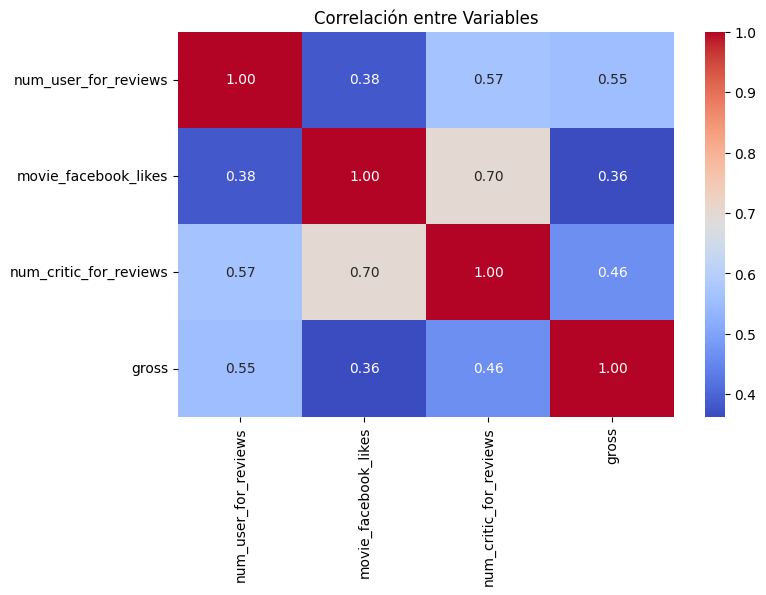

In [ ]:
# Mapa de calor para visualizar las correlaciones.
plt.figure(figsize=(8, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables')
plt.show()

In [ ]:
# Se calcula y muestra la correlación entre las principales variables budget, gross y imdb_score.
correlacion = dataset[['budget', 'gross', 'duration','imdb_score']].corr()
correlacion

,budget,gross,duration,imdb_score
budget,1.000000,0.100908,0.068669,0.027585
gross,0.100908,1.000000,0.245669,0.202076
duration,0.068669,0.245669,1.000000,0.363067
imdb_score,0.027585,0.202076,0.363067,1.000000


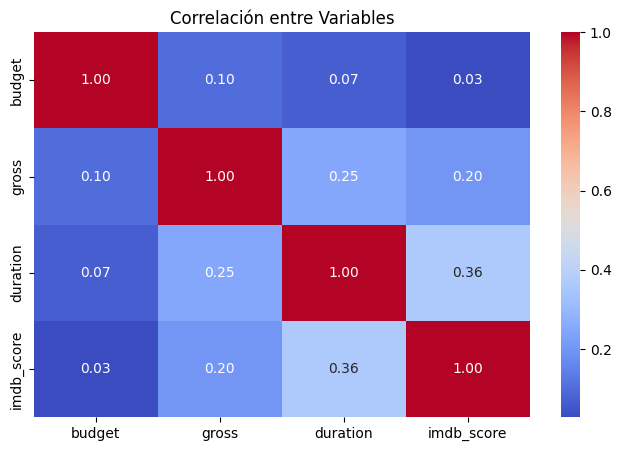

In [ ]:
# Mapa de calor para visualizar las correlaciones.
plt.figure(figsize=(8, 5))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables')
plt.show()

Gráfico de dispersión

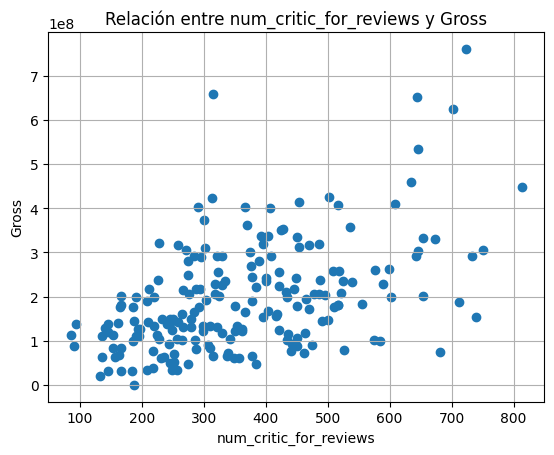

In [ ]:
# Gráfico de dispersión para analizar la relación entre num_critic_for_reviews y gross.
plt.scatter (dataset['num_critic_for_reviews'].head(200), dataset['gross'].head(200))
plt.title('Relación entre num_critic_for_reviews y Gross')
plt.xlabel('num_critic_for_reviews')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

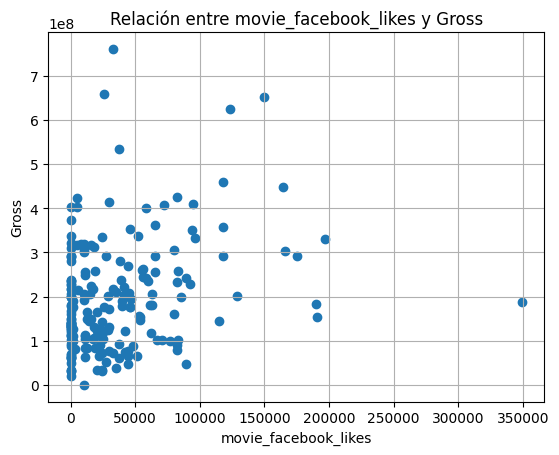

In [ ]:
# Crea un gráfico de dispersión para analizar la relación entre movie:facebook_likes y gross.
plt.scatter (dataset['movie_facebook_likes'].head(200), dataset['gross'].head(200))
plt.title('Relación entre movie_facebook_likes y Gross')
plt.xlabel('movie_facebook_likes')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

In [ ]:
# El modelo aprende patrones de los datos proporcionados para predecir la recaudación



# Definir características (X) y etiqueta (y) (datos destacados anteriormente), diviendo el conjunto de datos en entrenamiento y prueba

X = dataset[['budget', 'duration', 'imdb_score','num_user_for_reviews', 'movie_facebook_likes','num_critic_for_reviews']]
y = dataset['gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inicializar y entrenar el modelo de árbol de decisión para realizar predicciones

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Imprimir los resultados
print("Error Absoluto Medio (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("R² Score:", r2)

"""
El modelo predice aproximadamente el 32% de los datos
"""
print("")

Error Absoluto Medio (MAE): 37927960.94423806
Error Cuadrático Medio (MSE): 3446941802605179.0
R² Score: 0.3224794225083911



In [ ]:
 # 2.3 Diagnóstico del modelo
# Genera los gráficos de residuos vs. valores predichos y Q-Q plot.
# Analiza si se cumplen los supuestos de linealidad, homoscedasticidad, independencia y normalidad de los errores.

X = dataset['budget'].values
y = dataset['gross'].values


# Ajuste del modelo y predicciones
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
y_pred = slope * X + intercept


# Calcular SE de los residuales
n = len(X)
residuals = y - y_pred
SE_residual = np.sqrt(np.sum(residuals**2) / (n - 2))


# Calcular SE de la pendiente e intersección
X_mean = np.mean(X)
SE_slope = SE_residual / np.sqrt(np.sum((X - X_mean)**2))
SE_intercept = SE_residual * np.sqrt(1/n + (X_mean**2) / np.sum((X - X_mean)**2))


# Resultados
print("Error Estándar de la Pendiente (slope):", SE_slope)
print("Error Estándar de la Intersección (intercept):", SE_intercept)

Error Estándar de la Pendiente (slope): 0.004875510197064535
Error Estándar de la Intersección (intercept): 1094758.7253931684


In [ ]:
#Crea una nueva columna binaria que clasifique las películas como exitosas si sus ingresos están por encima del percentil 75, y no exitosas en caso contrario.
# Calculate the 75th percentile of the 'gross' column
percentil_75 = dataset['gross'].quantile(0.75)

# Create a new column 'exito' based on the condition
dataset['exito'] = dataset['gross'].apply(lambda x: 1 if x > percentil_75 else 0)

# Display the updated DataFrame to verify the changes
dataset.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,exito
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000.0,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0.0,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000.0,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,1
4,462.0,132.0,475.0,530.0,640.0,73058679.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000.0,1


Exactitud: 0.7724399494310998
Precisión: 0.6046511627906976
Sensibilidad: 0.26262626262626265
Puntaje F1: 0.36619718309859156
AUC: 0.7702999642291379


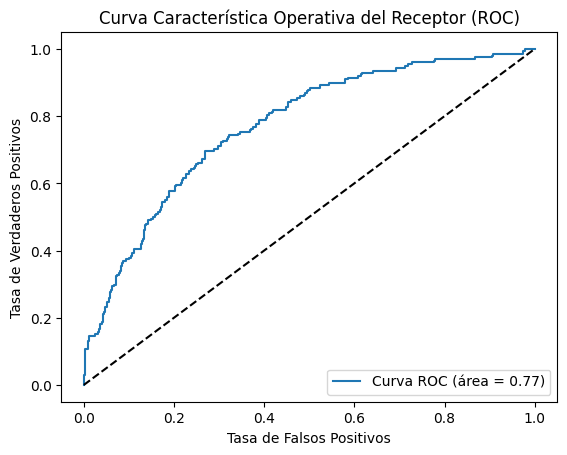

In [ ]:
#3.2 Construcción y evaluación del modelo
#Construye un modelo de regresión logística para clasificar las películas.
#Evalúa el modelo usando métricas como la precisión, sensibilidad, y F1 score. Genera y analiza la curva ROC y el valor AUC.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Definir las características (X) y la variable objetivo (y)
X = dataset[['budget', 'duration', 'imdb_score', 'num_user_for_reviews', 'movie_facebook_likes', 'num_critic_for_reviews']]
y = dataset['exito']  # Usando la columna 'exito' que creamos antes

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)  # Se aumentó max_iter para manejar posibles problemas de convergencia
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
exactitud = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Exactitud:", exactitud)
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Puntaje F1:", f1)

# Generar la curva ROC y el AUC
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidad de la clase 1 (exitosa)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

# Graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal que representa un clasificador aleatorio
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 4. Afinamiento y Evaluación Avanzada de Modelos
# 4.1 Validación cruzada
# Implementa validación cruzada para el modelo de regresión lineal y el modelo de regresión logística. Explica cómo mejora la generalización de los modelos.

scores_linear = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores_linear = -scores_linear
print("MSE (Regresión Lineal): %0.2f (+/- %0.2f)" % (mse_scores_linear.mean(), mse_scores_linear.std() * 2))


MSE (Regresión Lineal): 0.19 (+/- 0.19)


In [ ]:
# 4.2 Identificación de sobreajuste y subajuste
# Analiza los resultados de los modelos para determinar si presentan sobreajuste o subajuste. Propón estrategias para abordar estos problemas.

# Para abordar la problemática de sobreajuste podemos usar algunas estrategias como lo son:
# - Obtener más datos: Más datos puede ayudar al modelo a generalizar la información
# - Reducir la complejidad del modelo: Usar un modelo más simple con menos parámetros
# - Usar técnicas de validación cruzada: Ayuda a prevenir el sobreajuste al evaluar el modelo en diferentes conjuntos de datos.
# - Detener el entrenanmiento temprano: Detener el entrenamiento del modelo antes de que converja completamente para poder prevenir el sobreajuste.

#Para abordar la problemática de subajuste podemos usar algunas estrategias como lo son:
# - Usar un modelo más complejo: Usar un modelo con más parámetros, con un modelo no lineal.
# - Ingeniería de características: Crea nuevas características a partir de las existentes para proporcionar más información al modelo.
# - Reducir la regularización: Se debe intentar reducir la regularización para permitir que el modelo se ajuste mejor a los datos.

In [ ]:
# 4.3 Ajusta los hiperparámetros
# Ajusta los hiperparámetros del modelo de regresión logística (como el umbral de clasificación) para mejorar su rendimiento.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelo = LogisticRegression(max_iter=5000) # Aumentado max_iter

parametros = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(modelo, parametros, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

Mejores hiperparámetros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
"""
5. Extensión: K-Means para Segmentación de Películas
5.1 Agrupamiento de películas
Utiliza el algoritmo de K-Means para agrupar películas en función de variables como presupuesto, likes en Facebook de actores principales y número de críticas.
Determina el número óptimo de clusters usando el método del codo y analiza los resultados.
5.2 Interpretación de los clusters
Describe las características principales de cada cluster identificado y cómo podrían usarse en estrategias de marketing cinematográfico.

"""
print("")

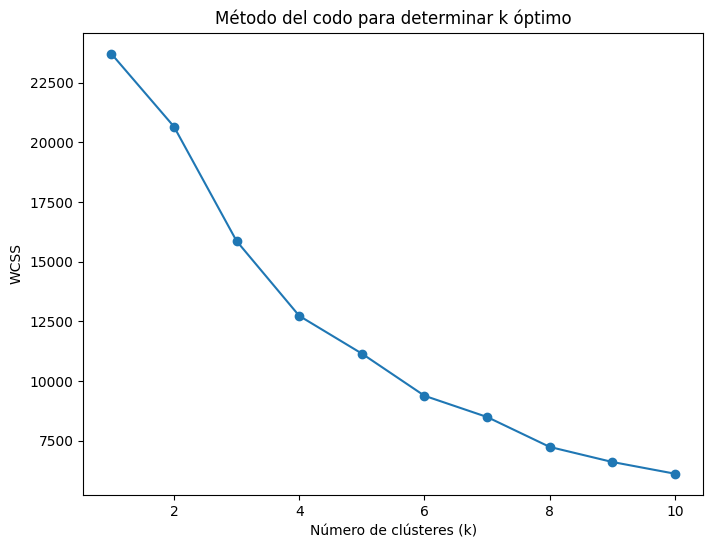

In [ ]:
#5.1 Agrupamiento de peliculas
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selección de variables relevantes  para la segmentacion
selected_features= ['budget', 'num_critic_for_reviews','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','imdb_score']
data_selected = dataset[selected_features]

# Estandarizar las caracterisitcas para normalizar la escalada de datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_selected)
# Convertir los datos estandarizados a un DataFrame para claridad
data_scaled_df = pd.DataFrame(scaled_data, columns=selected_features)

# Calcular el WCSS para diferentes valores de k (1 a 10)
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)
# Gráfico el diagrama de codo
# Graficar el diagrama de codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Método del codo para determinar k óptimo')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS')
plt.show()

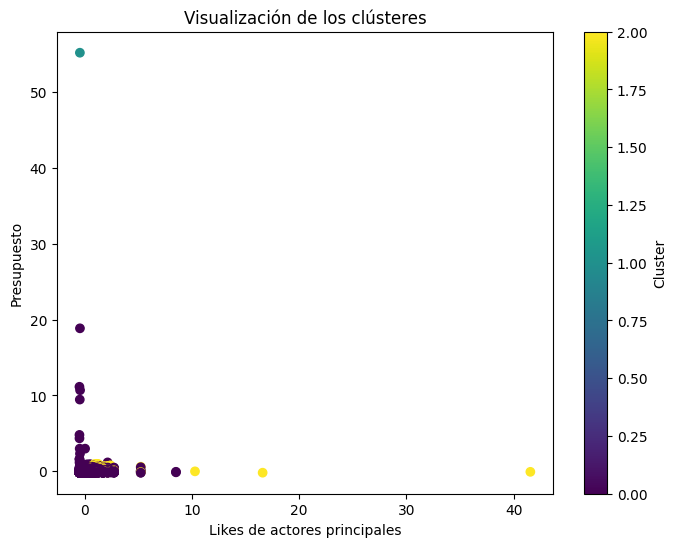

In [ ]:
# 3. Evaluación del modelo

# Basado en el gráfico, se asumen que el numero de clusteres que se presentan a partir del analisis de codos son 3, siendo que a partir de
# su visualizacion se puedan agrupar estos puntos
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data_scaled_df['Cluster'] = kmeans.fit_predict(data_scaled_df)

# Visualización de los clústeres (usando dos dimensiones como ejemplo)
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled_df['actor_1_facebook_likes'], data_scaled_df['budget'], c=data_scaled_df['Cluster'], cmap='viridis')
plt.title('Visualización de los clústeres')
plt.xlabel('Likes de actores principales')
plt.ylabel('Presupuesto')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# 5.2 Interpretación de los clusters
"""
Por medio de la grafica mostrada podemos ver 3 grupos diferentes
el primero es de peliculas de alto presupuesto en las que el actor principal no presenta likes en facebook
la segunda son peliculas de bajo presupuesto(entre 0 y 20) en las que el actor principal no presenta o presenta muy pocos likes de facebook
por ultimo tenemos a otro grupo que tiene bajo presupuesto pero el actor principal cuenta con mas de 1 like en facebook
respecto a la agrupacion de clusteres podemos darnos cuenta de que el presupuesto de una pelicula no inside a grandes rasgos en la cantidad de likes que pueden
presentar los actores, siendo asi que la finalidad de esta grafica tiene que ver mas con la promocion que pueden tener estos actores que posiblemente permitan
ayudar y mejorar el rodaje de la pelicula sin tener que ser tan conocidos.
asi que por ese motivo el ser capaz de buscar personas que puedan ser nuevas capaces de tomar el papel principal de una pelicula, sin que el proceso de rodaje
tenga un presupuesto tan alto puede ser una propuesta arriesgada de marketing que por medio de esta grafica se puede confiar.

"""
print("")

In [ ]:
# CONCLUSIONES

"""
A partir de los resultados obtenidos ya sea para el modelo de regresion y k-means se puede notar ciertas tendencias que tiende a tener el dataset,
para el caso de k-means no se encuentran tan dispersos los diferentes grupos que se consideran, siendo algo limitante y dificil de analizar para poder dar ideas para mejoras de proyectos,
aunque gracias a esos valores atipicos se pueden inferir algunos datos que permitan alguna idea que pueda hacerse realidad.

Y para el caso del modelo de regresion por medio del error estandar de la interseccion y el R^2, se pudo demostrar primero la mala precision que puede tener este dataset o el conjunto de
datos que se realizo y tambien la dependencia que pueden tener algunos campos de este dataset.

Asi que por medio de todo esto, la capacidad de  conocer las dependencias que pueden tener algunos puntos de un dataset  y la ideaa de intentar agrupar y poder definir permite
un mejor manejo del dataset ademas de posibles mejoras en el entendimiento de graficas y modelos, puede que ahora se denominen limitantes pero con un buen planteamiento se entiende
y podra tener la capacidad de mostrar verdaderos apoyos a la hora de plantear estrategias economicas y sociales.

"""
print("")